In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path

In [64]:
# init
path = Path.cwd().parent
data_path = path / 'data'

# Enable interactive plot
%matplotlib notebook

In [65]:
def load_casefile(case_name):
    case_path = data_path / case_name
    ## beats
    # load transmembrane potentials
    atrial_beats = np.loadtxt(case_path / 'atrial_beats.csv', delimiter=",", dtype=np.float64)
    ventricular_beats = np.loadtxt(case_path / 'ventricular_beats.csv', delimiter=",", dtype=np.float64)
    # load torso potentials
    torso_beats = np.loadtxt(case_path / 'ecg_64.csv', delimiter=",", dtype=np.float64)

    ## geometry
    # load heart geometry
    # left
    lcav_vertices = np.loadtxt(case_path / 'lcav_vertices.csv', delimiter=",", dtype=np.float64)
    lcav_triangles = np.loadtxt(case_path / 'lcav_triangles.csv', delimiter=",", dtype=np.int64)
    lcav_triangles = lcav_triangles - 1  # matlab indices start at 1
    # right
    rcav_vertices = np.loadtxt(case_path / 'rcav_vertices.csv', delimiter=",", dtype=np.float64)
    rcav_triangles = np.loadtxt(case_path / 'rcav_triangles.csv', delimiter=",", dtype=np.int64)
    rcav_triangles = rcav_triangles - 1  # matlab indices start at 1


    # load torso geometry
    electrode_positions = np.loadtxt(case_path / 'lead_locations.csv', delimiter=",", dtype=np.float64)
    thorax_vertices = np.loadtxt(case_path / 'thorax_vertices.csv', delimiter=",", dtype=np.float64)
    thorax_triangles = np.loadtxt(case_path / 'thorax_triangles.csv', delimiter=",", dtype=np.int64)
    thorax_triangles = thorax_triangles - 1  # matlab indices start at 1

    return atrial_beats, ventricular_beats, torso_beats, lcav_vertices, lcav_triangles, rcav_vertices, rcav_triangles, electrode_positions, thorax_vertices, thorax_triangles

In [84]:
def visualize_case(case_name):
    atrial_beats, ventricular_beats, torso_beats, lcav_vertices, lcav_triangles, rcav_vertices, rcav_triangles, electrode_positions, thorax_vertices, thorax_triangles = load_casefile(case_name)
    # plot
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    # left cavity
    ax.plot_trisurf(lcav_vertices[:,0], lcav_vertices[:,1], lcav_vertices[:,2], triangles=lcav_triangles, color='red', alpha=0.5, label='Left Cavity')
    # right cavity
    ax.plot_trisurf(rcav_vertices[:,0], rcav_vertices[:,1], rcav_vertices[:,2], triangles=rcav_triangles, color='blue', alpha=0.5, label='Right Cavity')
    # thorax
    #ax.plot_trisurf(thorax_vertices[:,0], thorax_vertices[:,1], thorax_vertices[:,2], triangles=thorax_triangles, color='white', alpha=0.3, label='Thorax')

    ax.scatter(electrode_positions[:,0], electrode_positions[:,1], electrode_positions[:,2], s=10, label='Electrodes')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title(f'Visualization of {case_name} Geometry and Electrode Positions')

    plt.show()

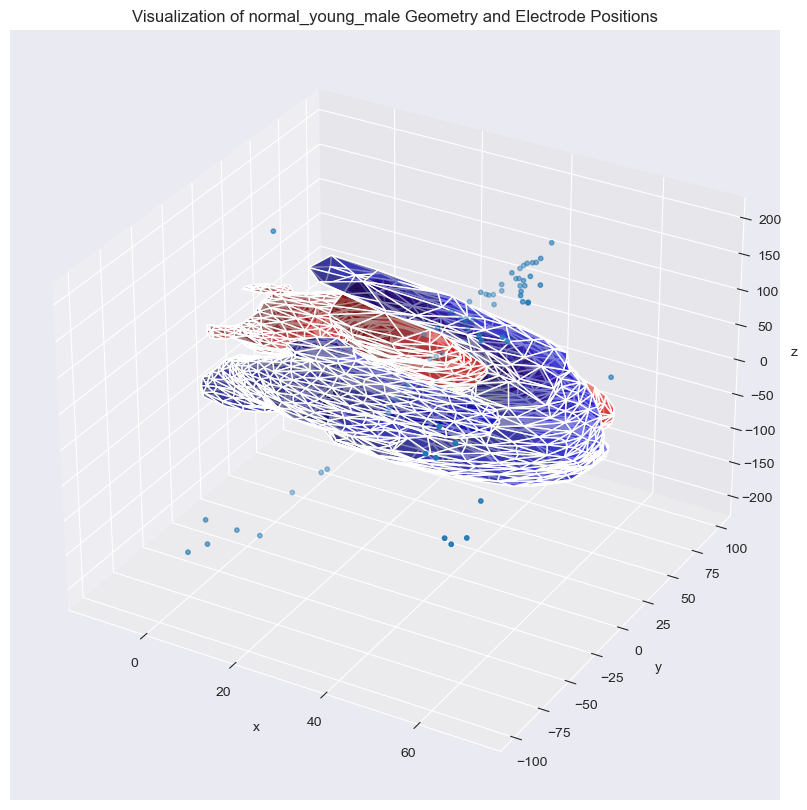

In [85]:
visualize_case('normal_young_male')

In [ ]:
# list all directories in data folder
case_names = [x.name for x in data_path.iterdir() if x.is_dir()]

for case_name in case_names:
    load_casefile(case_name)